# I Quality control



## 0 Data preparation

### 0.1 Loading necessary libraries

In [ ]:
!pip install scanpy[leiden] scrublet

In [ ]:
# basic libraries
import scanpy as sc
import pandas as pd
import numpy as np
import anndata as ad
import scrublet as scr
import matplotlib.pyplot as plt

### 0.2 Data loading

In [ ]:
!mkdir GSM4407907
!wget -O /content/GSM4407907/barcodes.tsv.gz https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4407nnn/GSM4407907/suppl/GSM4407907_barcodes.tsv.gz
!wget -O /content/GSM4407907/genes.tsv.gz https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4407nnn/GSM4407907/suppl/GSM4407907_genes.tsv.gz
!wget -O /content/GSM4407907/matrix.mtx.gz https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4407nnn/GSM4407907/suppl/GSM4407907_matrix.mtx.gz

--2023-11-10 09:37:21--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4407nnn/GSM4407907/suppl/GSM4407907_barcodes.tsv.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.12, 2607:f220:41e:250::10, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25570 (25K) [application/x-gzip]
Saving to: ‘/content/GSM4407907/barcodes.tsv.gz’

/content/GSM4407907 100%[===================>]  24.97K  --.-KB/s    in 0.06s   

2023-11-10 09:37:22 (399 KB/s) - ‘/content/GSM4407907/barcodes.tsv.gz’ saved [25570/25570]

--2023-11-10 09:37:22--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4407nnn/GSM4407907/suppl/GSM4407907_genes.tsv.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.12, 2607:f220:41e:250::10, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.11|:443... connected.
HTTP request sent, awaiting response... 

In [ ]:
!zcat /content/GSM4407907/genes.tsv.gz | awk 'BEGIN{ FS = OFS = "\t" } { print $0, ("Gene Expression") }' > /content/GSM4407907/features.tsv
!gzip /content/GSM4407907/features.tsv
!rm  /content/GSM4407907/genes.tsv.gz

In [ ]:
adata = sc.read_10x_mtx('/content/GSM4407907')

In [ ]:
adata.shape

(6260, 48816)

## 1  Filtering out low-quality cells

Number of counts per cellular barcode

Number of detected genes per cellular barcode

Proportion of mitochondrial

### 1.1 Calculating quality control metrics

Annotating the mitochondrial genes

In [ ]:
#Mitochondrial genes
adata.var['mt'] = adata.var_names.str.startswith('mt-')

In [ ]:
#QC:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=[20], log1p=True, inplace=True)

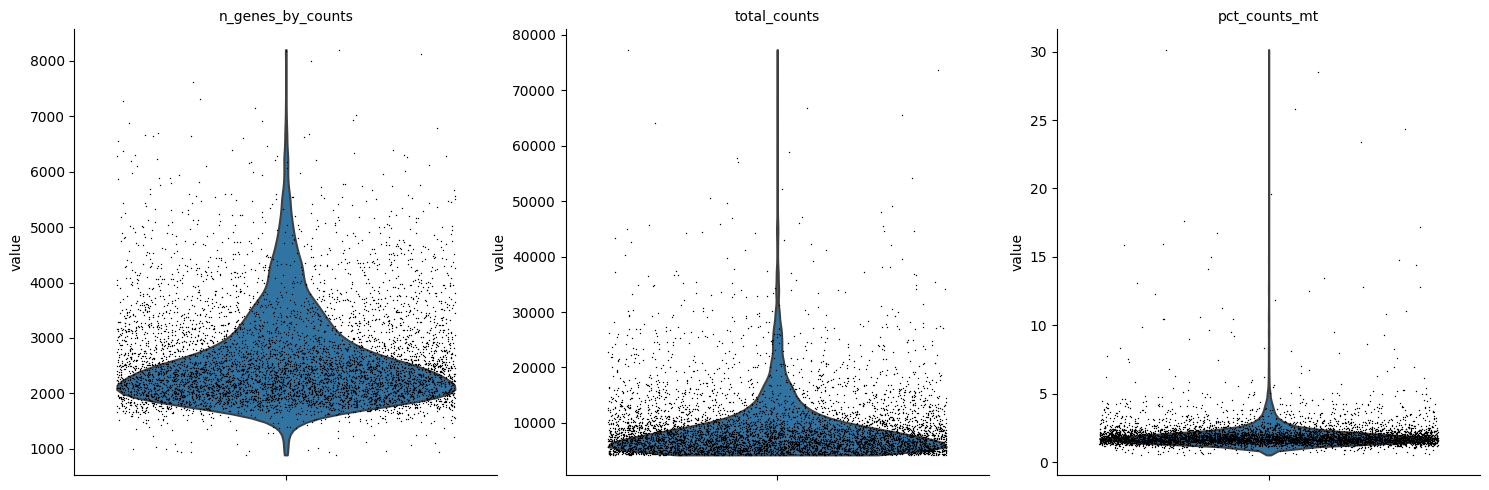

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

In [ ]:
adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
AAACCTGAGAACAACT-1,2236,7.712891,8947.0,9.099185,40.929921,132.0,4.890349,1.475355
AAACCTGAGAGCCCAA-1,2176,7.685703,6272.0,8.744010,17.187500,145.0,4.983607,2.311862
AAACCTGAGAGCTTCT-1,2208,7.700295,7997.0,8.986947,35.538327,126.0,4.844187,1.575591
AAACCTGAGGCGCTCT-1,5380,8.590630,32958.0,10.403020,32.156077,485.0,6.186209,1.471570
AAACCTGAGTCTTGCA-1,2041,7.621685,7150.0,8.875008,38.489510,144.0,4.976734,2.013986
...,...,...,...,...,...,...,...,...
TTTGTCAGTTGCGCAC-1,2156,7.676474,5639.0,8.637639,17.946444,111.0,4.718499,1.968434
TTTGTCATCAGAGACG-1,3185,8.066521,10308.0,9.240772,14.707024,190.0,5.252274,1.843229
TTTGTCATCAGTTAGC-1,2842,7.952615,8435.0,9.040263,14.985181,108.0,4.691348,1.280379
TTTGTCATCATTGCCC-1,2042,7.622175,4675.0,8.450198,14.930481,81.0,4.406719,1.732620


In [ ]:
print(f"Shape before filtering is {adata.shape}")

Shape before filtering is (6260, 48816)


### 1.2 Simple approach

filtering cells "manually"

In [ ]:
#Filtering step for all samples:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
print(f"Shape after filtering is {adata.shape}")

Shape after filtering is (6260, 21059)


## 2 Doublets removal

scr.scrub_doublets() simulates doublets from the observed data and uses a k-nearest-neighbor classifier to calculate a continuous doublet_score (between 0 and 1) for each transcriptome. The score is automatically thresholded to generate predicted_doublets, a boolean array that is True for predicted doublets and False otherwise.

In [ ]:
#Deliting doublets
dbl_rate = adata.X.shape[0]/1000 * 0.008  ## This is the calculation for 10x doublet rate but will be different for other platforms
scrub = scr.Scrublet(adata.X, expected_doublet_rate=dbl_rate)
adata.obs['doublet_scores'], adata.obs['predicted_doublets'] = scrub.scrub_doublets(min_counts=2, min_cells=3,
                                                        min_gene_variability_pctl=85, n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.58
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 1.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 8.3%
Elapsed time: 10.8 seconds


In [ ]:
adata.obs["predicted_doublets"].value_counts()

False    6253
True        7
Name: predicted_doublets, dtype: int64

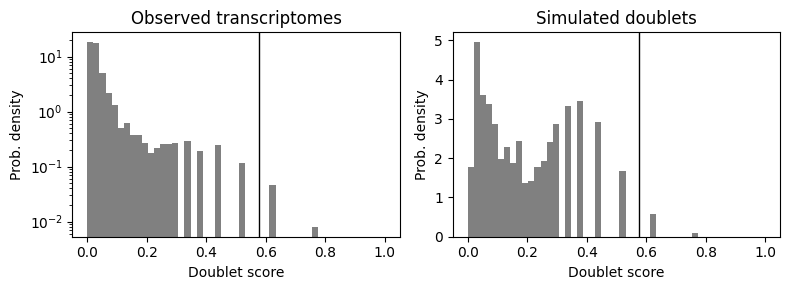

In [ ]:
scrub.plot_histogram();

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


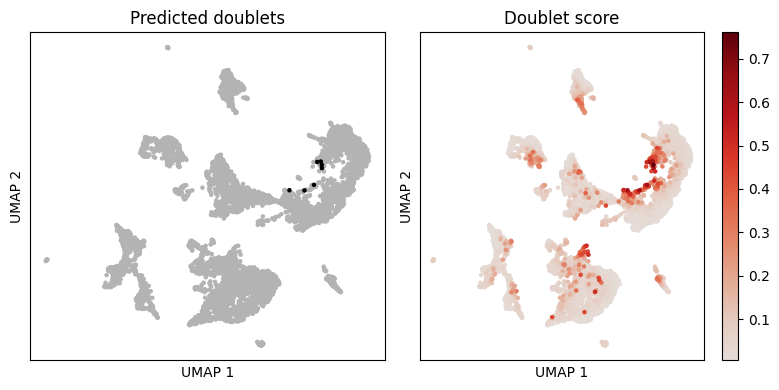

In [ ]:
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
scrub.plot_embedding('UMAP', order_points=True);

In [ ]:
adata = adata[~adata.obs["predicted_doublets"]]

In [ ]:
adata.write_h5ad('/content/GSM4407907.h5ad')

# II Cell type identification

## 0 Data preparation

### 0.1 Preprocessing

In [ ]:
!pip install celltypist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 58.9 MB/s eta 0:00:00


In [ ]:
import celltypist
from celltypist import models

In [ ]:
# normalization; here we set desired target sum because the celltypist tool requires it
sc.pp.normalize_total(adata, target_sum=1e4)

# shifted logarithm transformation
sc.pp.log1p(adata)

# we will also store this as layer to run celltypist later
adata.layers["normlog"] = adata.X.copy()



# identifying highly variable genes
sc.pp.highly_variable_genes(adata)

# scaling the data; necessary step to compute cleaner pca
sc.pp.scale(adata)

# running pca on genes detected as highly variable
sc.pp.pca(adata, use_highly_variable=True)

# computing neighborhood graph
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=20, knn=True)

# finally, we compute 2d representation of our data using umap and store it
sc.tl.umap(adata, random_state=309)

### 0.2 Clusters identification

In [ ]:
#leiden clustering

sc.tl.leiden(adata, resolution=0.5, key_added="leiden_0.5")
sc.tl.leiden(adata, resolution=0.75, key_added="leiden_0.75")
sc.tl.leiden(adata, resolution=1, key_added="leiden_1")
sc.tl.leiden(adata, resolution=1.25, key_added="leiden_1.25")
sc.tl.leiden(adata, resolution=1.5, key_added="leiden_1.5")
sc.tl.leiden(adata, resolution=1.75, key_added="leiden_1.75")
sc.tl.leiden(adata, resolution=2, key_added="leiden_2")

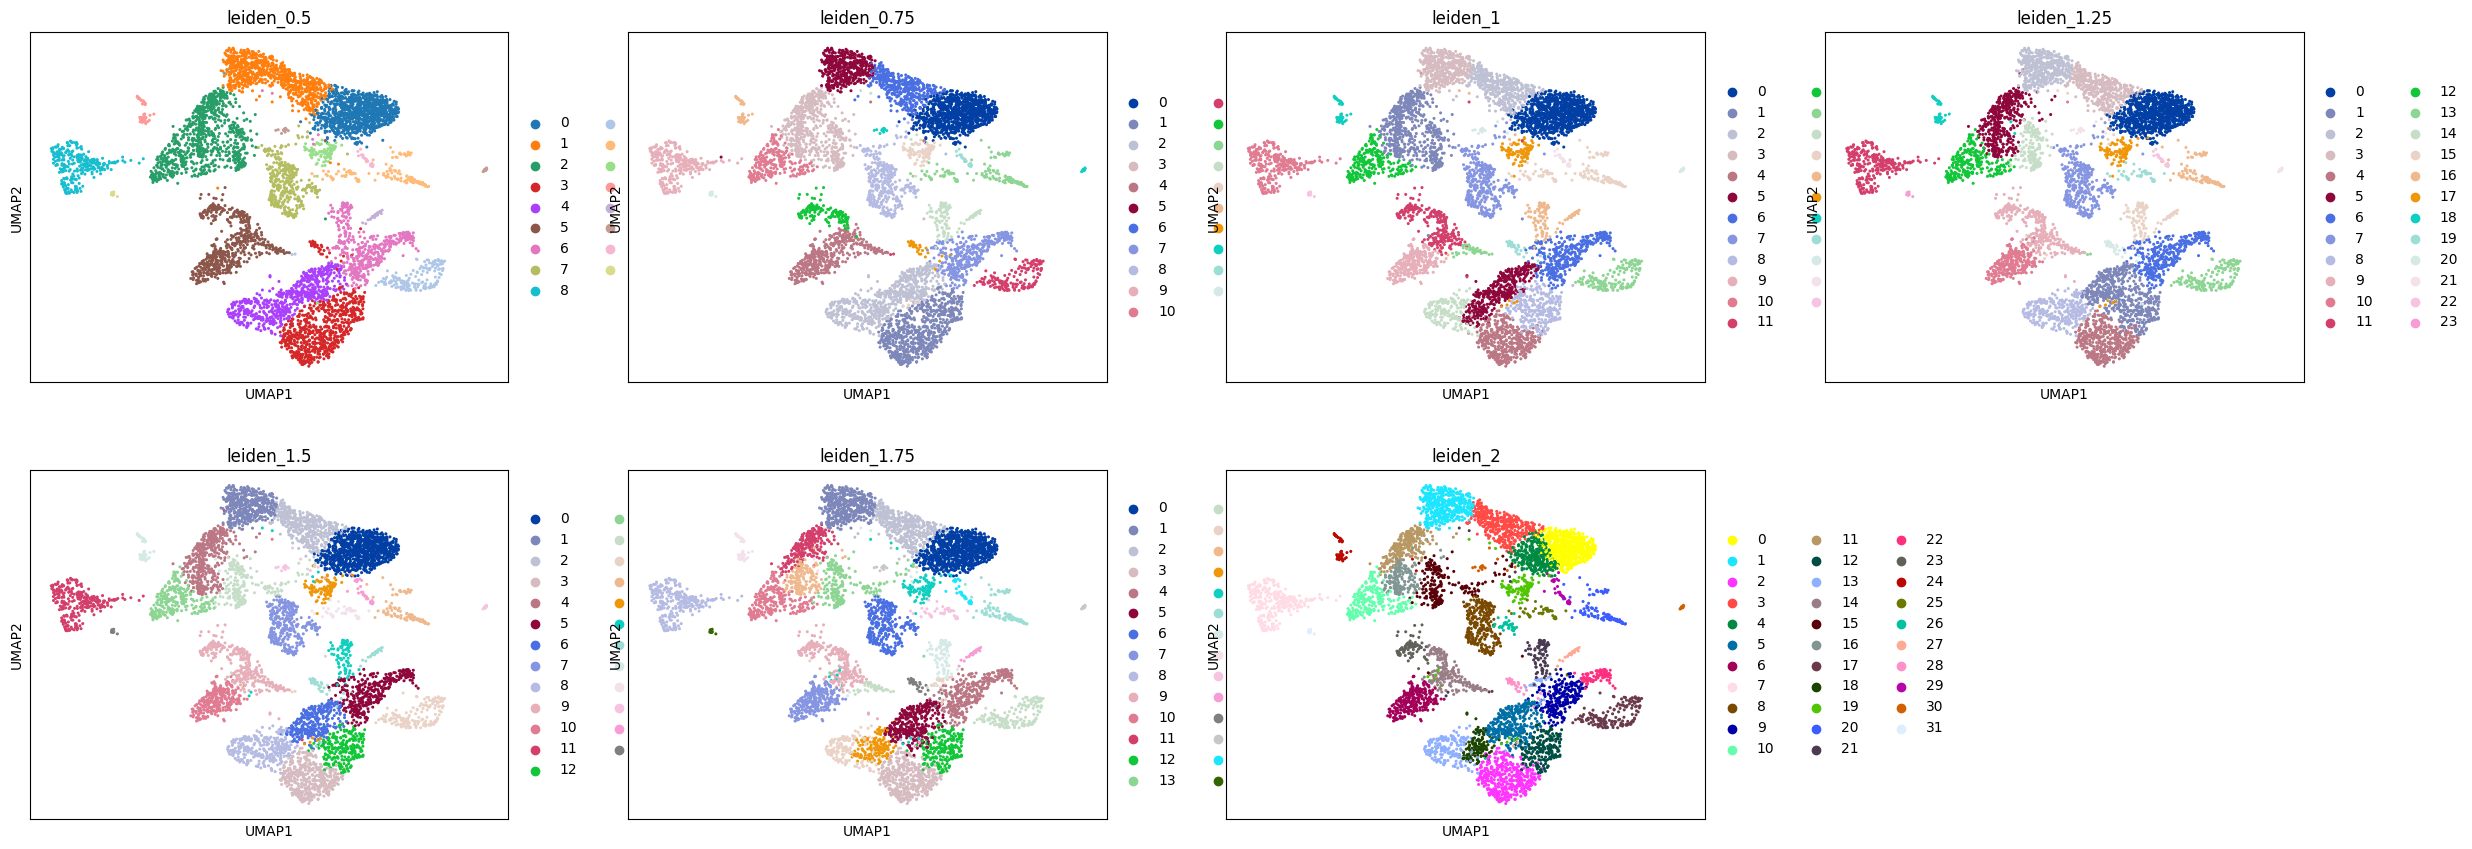

In [ ]:
sc.pl.umap(adata, color=["leiden_0.5", "leiden_0.75", "leiden_1", "leiden_1.25", "leiden_1.5", "leiden_1.75", "leiden_2"])

In [ ]:
adata

AnnData object with n_obs × n_vars = 6253 × 21059
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_scores', 'predicted_doublets', 'leiden_0.5', 'leiden_0.75', 'leiden_1', 'leiden_1.25', 'leiden_1.5', 'leiden_1.75', 'leiden_2'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_0.5_colors', 'leiden_0.75_colors', 'leiden_1_colors', 'leiden_1.25_colors', 'leiden_1.5_colors', 'leiden_1.75_colors', 'leiden_2_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'normlog'
    obsp: 'distances', 'connectivities'

In [ ]:
#DsRed and Krt14: epithelium, Fn1 and Vim: mesenchyme, Cdh5: endothelial cell, Ccl12: leukocyte.
#Classified population based on the marker genes analyzed in Figure 1B.
#The four clusters comprised of Krt14 + epithelium (blue), Fn1 + mesenchyme (orange), Cdh5 + endothelial cell (pink), and Ccl12 + leukocyte (gray)
#Amel: ameloblast, Tbx1: IEE and OEE, Sfrp5: IEE and OEE, Notch1: SI, Notch2: SR, Dmp1: odontoblast (Od).

## 1 ML-based annotation

### 1.1 Data preparation

In [ ]:
adata_celltypist = adata.copy()
adata_celltypist.X = adata_celltypist.layers["normlog"]

adata_celltypist.X.expm1().sum(axis = 1)

matrix([[ 9999.953],
        [ 9999.992],
        [ 9999.971],
        ...,
        [10000.049],
        [10000.074],
        [ 9999.997]], dtype=float32)

### 1.2 Model selection

In [ ]:
my_model = models.Model.load(model = 'Adult_Mouse_Gut.pkl')

In [ ]:
my_model.cell_types

array(['Activated CD4+ T cell', 'B cell', 'Basophil', 'CD4',
       'CD8+ T cell', 'Ccr7 DC', 'Cd11c Mac', 'Cd206 Mac', 'Clec4e mono',
       'D.cells', 'DC', 'DC (CD103+ CD11+b)', 'DC (CD103+ CD11-b)',
       'DC (CD103- C2)', 'EC.Reg4', 'EP', 'EarlyGC_1', 'EarlyGC_2',
       'Endocrine', 'Endothelial cell', 'Enterocyte', 'Enterocyte.1',
       'Enterocyte.2', 'Enterocyte.Immature.Distal',
       'Enterocyte.Immature.Proximal', 'Enterocyte.Mature.Distal',
       'Enterocyte.Mature.Proximal', 'Enterocyte.Progenitor',
       'Enterocyte.Progenitor.Early', 'Enterocyte.Progenitor.Late',
       'Enterocyte.dist', 'Enterocyte.prox', 'Enteroendocrine',
       'Epithelial', 'Epithelial cell C1', 'Epithelial cell C2',
       'Fibroblast', 'GC B cell (DZ)', 'GC B cell (LZ)', 'Glia_1',
       'Glia_2', 'Glia_3', 'Goblet', 'ILC1', 'ILC2', 'ILC3', 'ISC-I',
       'ISC-II', 'ISC-III', 'Inflammatory Monocytes', 'K.cells',
       'LTi cell', 'Ly6c2 Mono', 'Lymphatic endothelial-like cell',
       'M.

### 1.3 Transferring the labels

In [ ]:
predictions = celltypist.annotate(adata_celltypist, model = my_model, majority_voting = True)

In [ ]:
adata_celltypist = predictions.to_adata()

In [ ]:
adata_celltypist.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,n_genes,doublet_scores,...,leiden_0.75,leiden_1,leiden_1.25,leiden_1.5,leiden_1.75,leiden_2,predicted_labels,over_clustering,majority_voting,conf_score
AAACCTGAGAACAACT-1,2236,7.712891,8947.0,9.099185,40.929921,132.0,4.890349,1.475355,2236,0.025683,...,0,0,0,0,0,0,Cd206 Mac,61,Cd206 Mac,0.231109
AAACCTGAGAGCCCAA-1,2176,7.685703,6272.0,8.744010,17.187500,145.0,4.983607,2.311862,2176,0.025683,...,2,5,1,6,5,5,Fibroblast,35,Fibroblast,0.262126
AAACCTGAGAGCTTCT-1,2208,7.700295,7997.0,8.986947,35.538327,126.0,4.844187,1.575591,2208,0.074792,...,6,2,3,2,2,3,Cd11c Mac,12,Cd11c Mac,0.965917
AAACCTGAGGCGCTCT-1,5380,8.590630,32958.0,10.403020,32.156077,485.0,6.186209,1.471570,5380,0.033179,...,0,0,0,0,0,4,Fibroblast,68,Cd206 Mac,0.997820
AAACCTGAGTCTTGCA-1,2041,7.621685,7150.0,8.875008,38.489510,144.0,4.976734,2.013986,2041,0.027377,...,0,0,0,0,0,0,Fibroblast,42,Cd206 Mac,0.496845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTTGCGCAC-1,2156,7.676474,5639.0,8.637639,17.946444,111.0,4.718499,1.968434,2156,0.008522,...,4,9,10,10,7,6,Sirpa DC,26,Cd11c Mac,0.003604
TTTGTCATCAGAGACG-1,3185,8.066521,10308.0,9.240772,14.707024,190.0,5.252274,1.843229,3185,0.010082,...,3,1,5,4,16,16,Cd11c Mac,2,Sirpa DC,0.926510
TTTGTCATCAGTTAGC-1,2842,7.952615,8435.0,9.040263,14.985181,108.0,4.691348,1.280379,2842,0.008522,...,9,10,11,11,8,7,Endothelial cell,50,Cd206 Mac,0.999572
TTTGTCATCATTGCCC-1,2042,7.622175,4675.0,8.450198,14.930481,81.0,4.406719,1.732620,2042,0.008153,...,7,6,6,5,4,9,Cd11c Mac,37,Fibroblast,0.999881


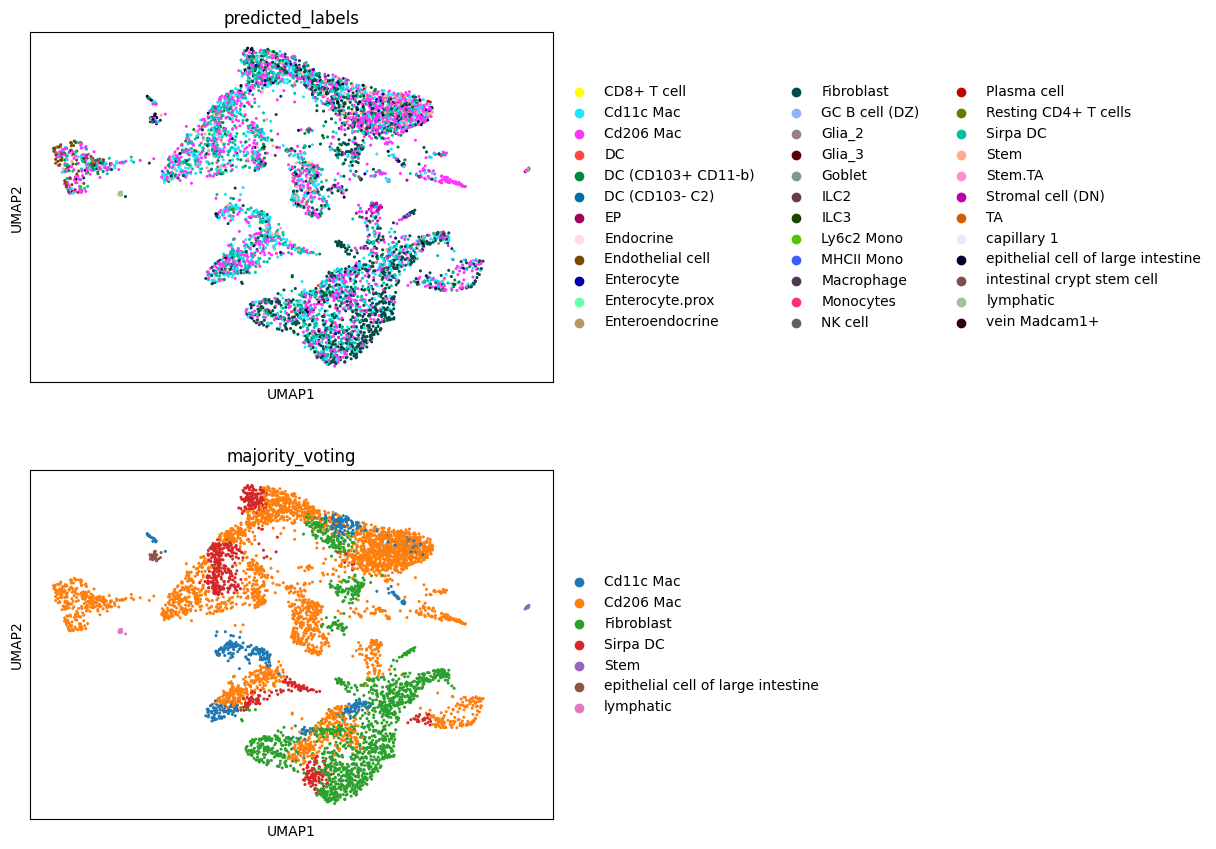

In [ ]:
sc.pl.umap(adata_celltypist, color = ['predicted_labels', 'majority_voting'], ncols=1)

## 2 Manual annotation

### 2.1 Starting from markers

In [ ]:
#DsRed and Krt14: epithelium, Fn1 and Vim: mesenchyme, Cdh5: endothelial cell, Ccl12: leukocyte.
#Amel: ameloblast, Tbx1: IEE and OEE, Sfrp5: IEE and OEE, Notch1: SI, Notch2: SR, Dmp1: odontoblast (Od).

In [ ]:
markers = {
    "Epithelium": ["Krt14", "tg_DsRed"],
    "Dental mesenchyme": ["Fn1", "Vim"],
    "Endothelial": ["Cdh5"],
    "Leukocyte": ["Ccl12"],
    "Ameloblast": ["Amelx"],
    "IEE / OEE": ["Tbx1", "Sfrp5"],
    "SI / SR": ["Notch1", "Notch2"],
    "Odontoblast": ["Dmp1"],
}

Epithelium


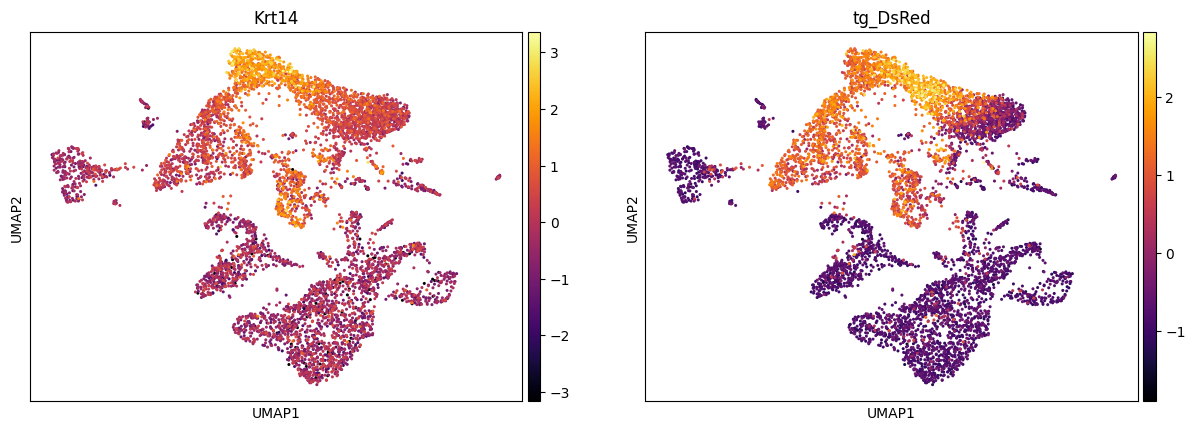

Dental mesenchyme


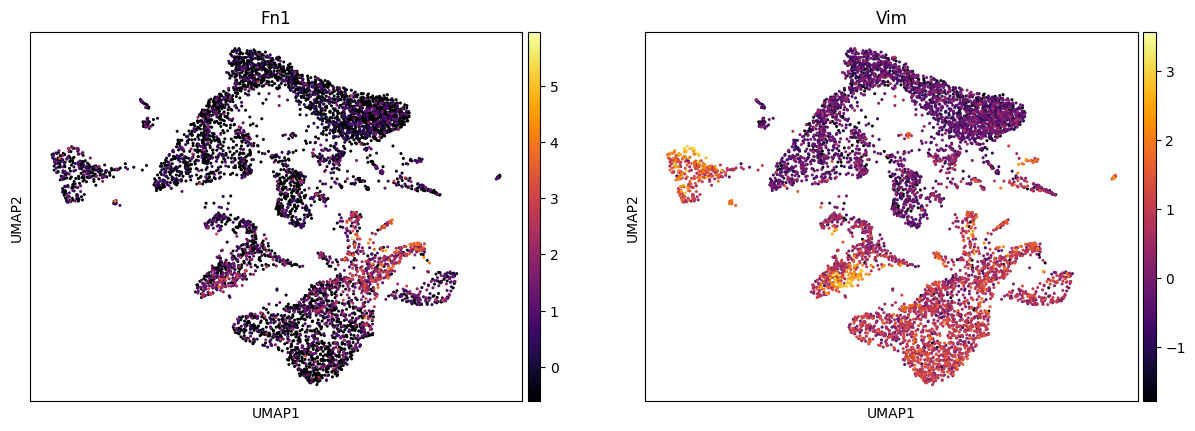

Endothelial


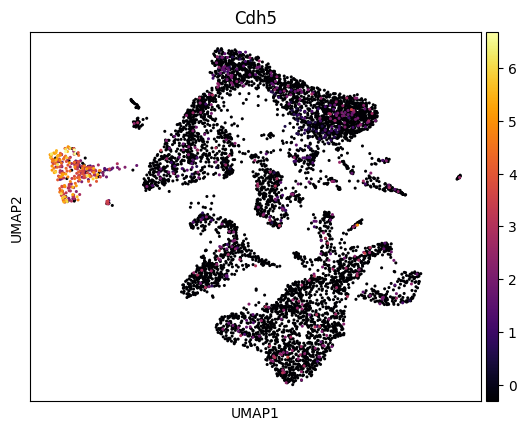

Leukocyte


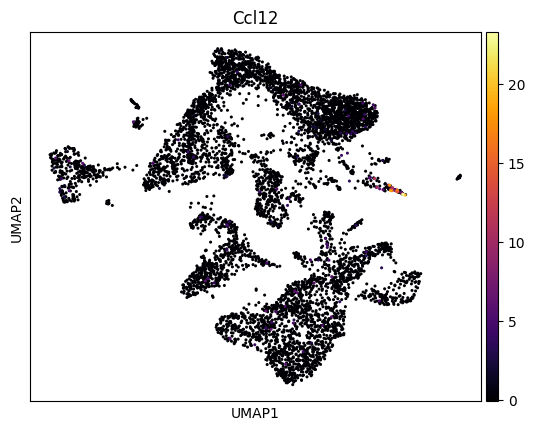

Ameloblast


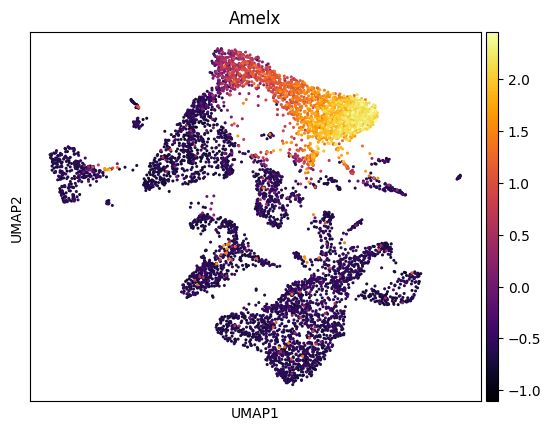

IEE / OEE


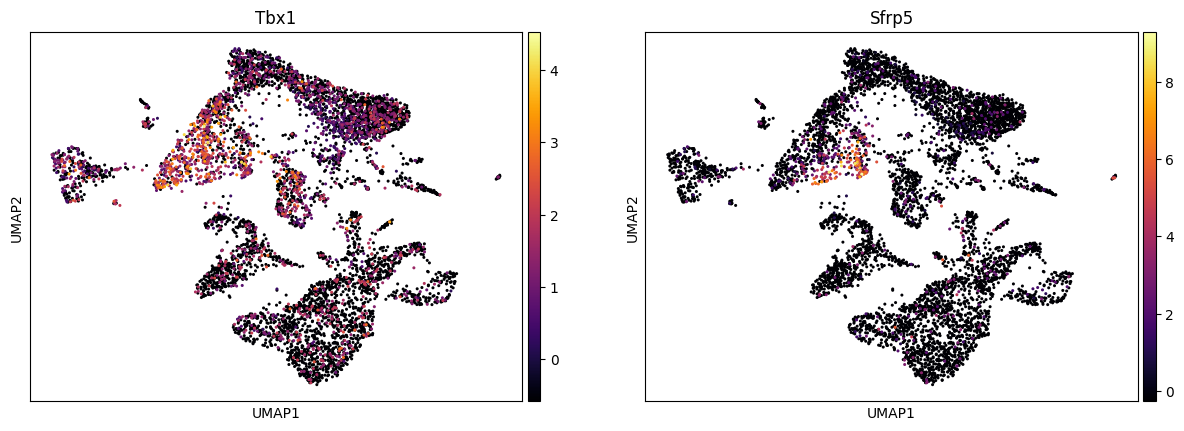

SI / SR


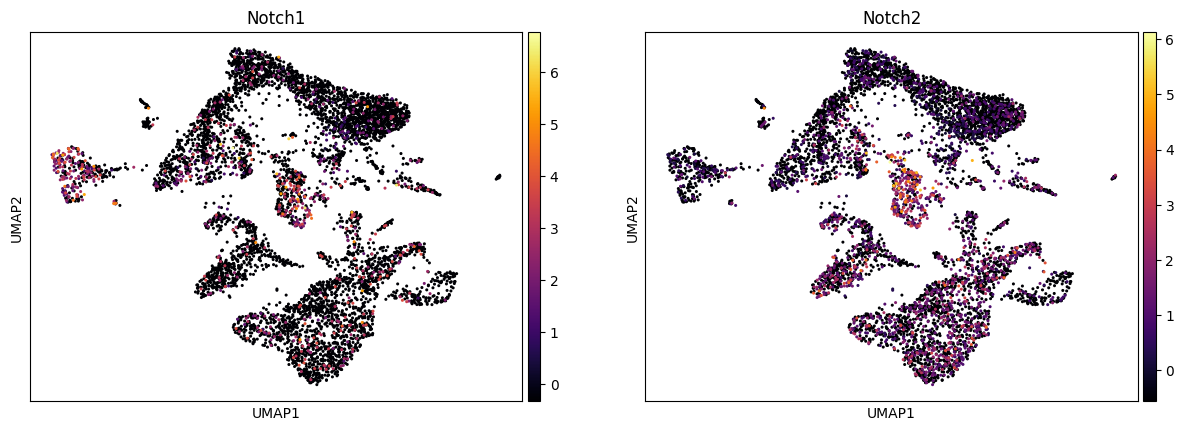

Odontoblast


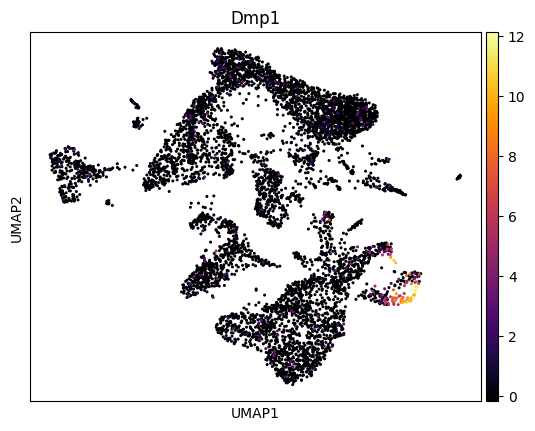

In [ ]:
for marker in markers:
  print(marker)
  sc.pl.umap(adata, color=markers[marker], cmap='inferno')

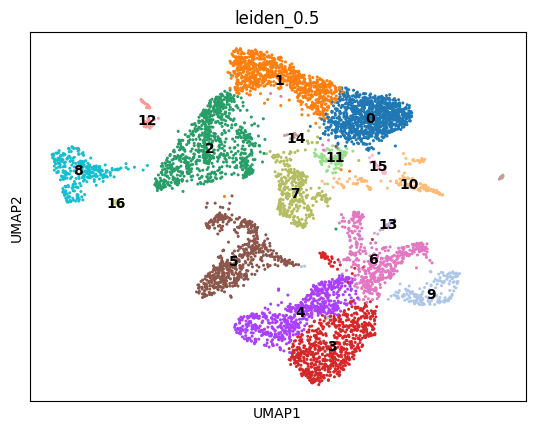

In [ ]:
sc.pl.umap(adata, color='leiden_0.5', legend_loc='on data')

In [ ]:
adata.obs['leiden_0.5'] = adata.obs['leiden_0.5'].astype(str)
adata.obs.loc[adata.obs['leiden_0.5'] == '9', 'leiden_0.5'] = 'Odontoblast'
adata.obs.loc[adata.obs['leiden_0.5'] == '10', 'leiden_0.5'] = 'Leukocyte'
adata.obs.loc[adata.obs['leiden_0.5'] == '8', 'leiden_0.5'] = 'Endothelial'
adata.obs.loc[adata.obs['leiden_0.5'] == '2', 'leiden_0.5'] = 'IEE / OEE'
adata.obs.loc[adata.obs['leiden_0.5'] == '1', 'leiden_0.5'] = 'Ameloblast'
adata.obs.loc[adata.obs['leiden_0.5'] == '0', 'leiden_0.5'] = 'Ameloblast'
adata.obs.loc[adata.obs['leiden_0.5'] == '11', 'leiden_0.5'] = 'Ameloblast'
adata.obs.loc[adata.obs['leiden_0.5'] == '15', 'leiden_0.5'] = 'Ameloblast'
adata.obs.loc[adata.obs['leiden_0.5'] == '7', 'leiden_0.5'] = 'SI / SR'
adata.obs.loc[adata.obs['leiden_0.5'] == '16', 'leiden_0.5'] = 'SI / SR'
adata.obs.loc[adata.obs['leiden_0.5'] == '6', 'leiden_0.5'] = 'Dental mesenchyme'
adata.obs.loc[adata.obs['leiden_0.5'] == '13', 'leiden_0.5'] = 'Dental mesenchyme'
adata.obs.loc[adata.obs['leiden_0.5'] == '5', 'leiden_0.5'] = 'Dental mesenchyme'
adata.obs.loc[adata.obs['leiden_0.5'] == '4', 'leiden_0.5'] = 'Dental mesenchyme'
adata.obs.loc[adata.obs['leiden_0.5'] == '3', 'leiden_0.5'] = 'Dental mesenchyme'
adata.obs.loc[adata.obs['leiden_0.5'] == '14', 'leiden_0.5'] = 'Dental mesenchyme'
adata.obs.loc[adata.obs['leiden_0.5'] == '12', 'leiden_0.5'] = 'IEE / OEE'

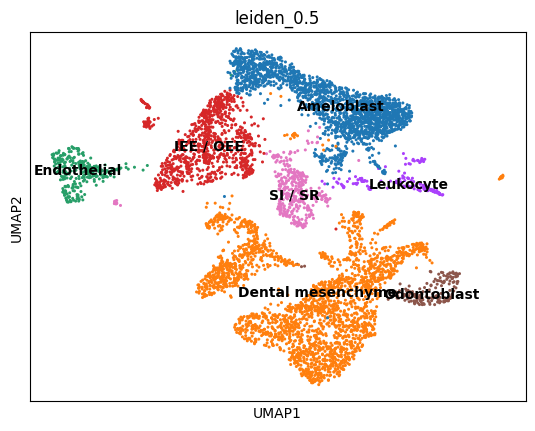

In [ ]:
sc.pl.umap(adata, color='leiden_0.5', legend_loc='on data')

In [ ]:
adata_celltypist_2 = adata.copy()
adata_celltypist_2.X = adata_celltypist_2.layers["normlog"]

adata_celltypist_2.X.expm1().sum(axis = 1)

matrix([[ 9999.953],
        [ 9999.992],
        [ 9999.971],
        ...,
        [10000.049],
        [10000.074],
        [ 9999.997]], dtype=float32)

In [ ]:
adata_celltypist_2.var_names = adata_celltypist_2.var_names.str.upper()

In [ ]:
my_model = models.Model.load(model = 'Adult_Human_Skin.pkl')

In [ ]:
predictions = celltypist.annotate(adata_celltypist_2, model = my_model, majority_voting = True)

In [ ]:
adata_celltypist_2 = predictions.to_adata()

In [ ]:
adata_celltypist_2.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,n_genes,doublet_scores,...,leiden_0.75,leiden_1,leiden_1.25,leiden_1.5,leiden_1.75,leiden_2,predicted_labels,over_clustering,majority_voting,conf_score
AAACCTGAGAACAACT-1,2236,7.712891,8947.0,9.099185,40.929921,132.0,4.890349,1.475355,2236,0.025683,...,0,0,0,0,0,0,VE2,61,Differentiated_KC,0.068805
AAACCTGAGAGCCCAA-1,2176,7.685703,6272.0,8.744010,17.187500,145.0,4.983607,2.311862,2176,0.025683,...,2,5,1,6,5,5,VE2,35,F2,0.995338
AAACCTGAGAGCTTCT-1,2208,7.700295,7997.0,8.986947,35.538327,126.0,4.844187,1.575591,2208,0.074792,...,6,2,3,2,2,3,Differentiated_KC,12,Differentiated_KC,0.113087
AAACCTGAGGCGCTCT-1,5380,8.590630,32958.0,10.403020,32.156077,485.0,6.186209,1.471570,5380,0.033179,...,0,0,0,0,0,4,Macro_1,68,Macro_1,0.414006
AAACCTGAGTCTTGCA-1,2041,7.621685,7150.0,8.875008,38.489510,144.0,4.976734,2.013986,2041,0.027377,...,0,0,0,0,0,0,Macro_1,42,Differentiated_KC,0.965413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTTGCGCAC-1,2156,7.676474,5639.0,8.637639,17.946444,111.0,4.718499,1.968434,2156,0.008522,...,4,9,10,10,7,6,Macro_1,26,Macro_1,0.079643
TTTGTCATCAGAGACG-1,3185,8.066521,10308.0,9.240772,14.707024,190.0,5.252274,1.843229,3185,0.010082,...,3,1,5,4,16,16,F2,2,Differentiated_KC,0.094233
TTTGTCATCAGTTAGC-1,2842,7.952615,8435.0,9.040263,14.985181,108.0,4.691348,1.280379,2842,0.008522,...,9,10,11,11,8,7,VE2,50,VE2,0.106542
TTTGTCATCATTGCCC-1,2042,7.622175,4675.0,8.450198,14.930481,81.0,4.406719,1.732620,2042,0.008153,...,7,6,6,5,4,9,F1,37,Macro_1,0.395946


In [ ]:
my_model.cell_types

array(['DC1', 'DC2', 'Differentiated_KC', 'F1', 'F2', 'F3', 'ILC1_3',
       'ILC1_NK', 'ILC2', 'Inf_mac', 'LC', 'LE1', 'LE2', 'Macro_1',
       'Macro_2', 'Mast_cell', 'Melanocyte', 'MigDC', 'Mono_mac', 'NK',
       'Pericyte_1', 'Pericyte_2', 'Plasma', 'Schwann_1', 'Schwann_2',
       'Tc', 'Th', 'Treg', 'Undifferentiated_KC', 'VE1', 'VE2', 'VE3',
       'migLC', 'moDC'], dtype=object)